### Name : Zahra Soukhtedel
### StudentID : 98105138

### 1.Fitzhugh-Nagumo model

#### 1.1 
#### defining each parameter in model below :

\begin{equation} 
\begin{cases}
  \dot{V} = V - V^3 - w + I\\
  \dot{w} = 0.08(v + 0.7 - 0.8 w)
\end{cases}
\end{equation}

The variable V is a voltage-like membrane potential having cubic nonlinearity that allows regenerative self-excitation via a positive feedback.

w is called the recovery variable having linear dynamics that provides a slower negative feedback.

The parameter I corresponds to a stimulus current. A positive current I corresponds to a current directed from outside the cell membrane to inside.

And constants 0.8, 0.7 are controlling parameters of the system. and constant 0.08 is responsible for the evolution of w being slower than the evolution of v.



#### 1.2 

#### Implement these equations in Python (solve the differential equation numerically) and draw multiple trajectories for different initial points in the phase plane. Run the model for I=3.0 and bring the trajectory image in your report.

In [75]:
#!pip install brainpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [76]:
import brainpy as bp
import brainpy.math as bm
import matplotlib.pyplot as plt
from functools import partial
import numpy as np
import scipy.integrate
import scipy
import matplotlib.patches as mpatches #used to write custom legends
%matplotlib inline

bm.set_platform('cpu')

bp.__version__

'2.3.8'

first we implement ODEs as follows using BrainPy:


In [77]:
@bp.odeint(dt=0.01)
def fitzhugh_nagumo(V, w, t, Iext, a, b, tau):
    dw = (V + a - b * w) / tau
    dV = V - V * V * V - w + Iext
    return dV, dw

for the given parameters,

In [78]:
a = 0.7
b = 0.8
tau = 12.5

we will plot some trajectories for model above, for some initial conditions:

Implement the flow of the Fitzhugh-Nagumo model.And simulate some trajectories.

In [79]:
def plot_vector_field(ax, xrange, yrange, Iext, a, b, tau, steps=50):
    # Compute the vector field
    x = np.linspace(xrange[0], xrange[1], steps)
    y = np.linspace(yrange[0], yrange[1], steps)
    X,Y = np.meshgrid(x,y)
    dx,dy = model(X, Y, Iext, a, b, tau)
    ax.streamplot(X,Y,dx, dy, color=(0,0,0,.1))
    ax.set(xlim=(xrange[0], xrange[1]), ylim=(yrange[0], yrange[1]))


def model(V, w, Iext, a, b, tau):
    'FitzHugh–Nagumo model'
    dw = (V + a - b * w) / tau
    dV = V - V * V * V - w + Iext
    return np.array([dV, dw])
    
def get_trajectory(Iext, a, b, tau):
  times = bm.arange(0, 100, 0.01)
  hist_V = []
  hist_w = []
  V, w = 0., 0.
  for t in times:
     V, w = fitzhugh_nagumo(V, w, t, Iext, a, b, tau)
     hist_V.append(V)
     hist_w.append(w)
  
  # plt.subplot(1, 2, 1)
  # plt.plot(times, hist_V)
  # plt.xlabel('t ')
  # plt.ylabel('V ')

  # plt.subplot(1, 2, 2)
  # plt.plot(hist_w, hist_V)
  # plt.xlabel('w ')
  # plt.ylabel('V ')
  # plt.show()
  fig, ax = plt.subplots(1,1, figsize=(4, 4))
  x_range = (zoom_out(np.min(hist_V), False), zoom_out(np.max(hist_V), True))
  y_range = (zoom_out(np.min(hist_w), False), zoom_out(np.max(hist_w), True))
  plot_vector_field(ax, x_range, y_range, Iext, a, b, tau)
  ax.set(xlabel='v', ylabel='w')
  ax.plot(hist_V, hist_w)
  fig.show()

def zoom_out(a, maxi):
  if maxi:
    if a>0:
      return 1.5 * a
    else :
      return 0.5 * a 
  else:
    if a<0:
      return 1.5 * a
    else :
      return 0.5 * a     

Iext = 0.0
Iext = 0.15
Iext = 0.3
Iext = 0.44999999999999996
Iext = 0.6
Iext = 0.75
Iext = 0.8999999999999999
Iext = 1.05
Iext = 1.2
Iext = 1.3499999999999999


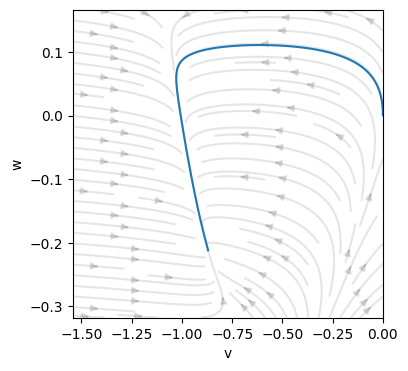

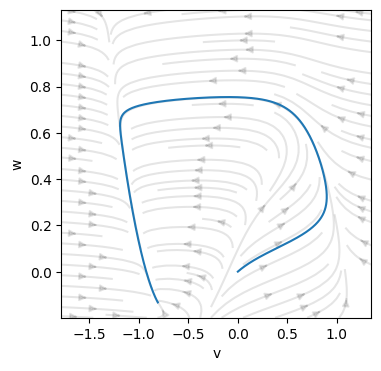

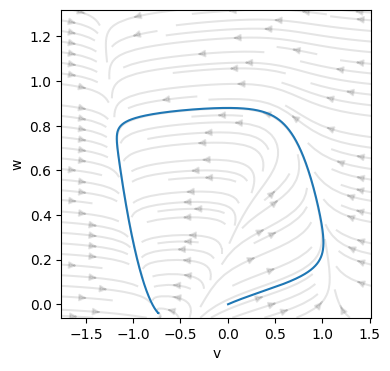

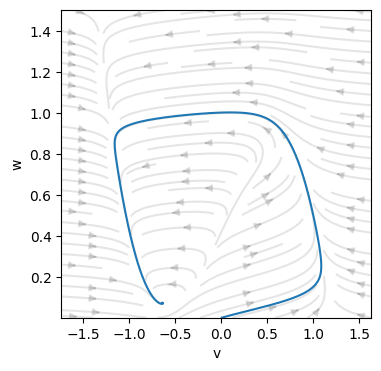

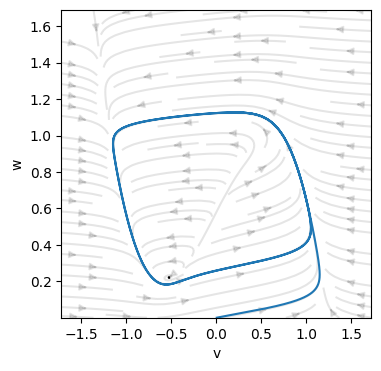

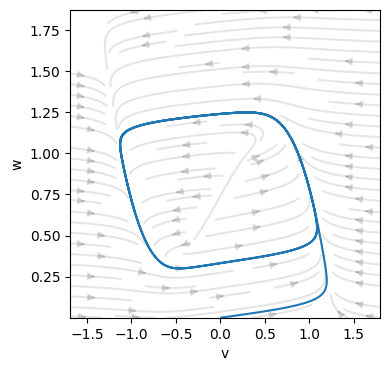

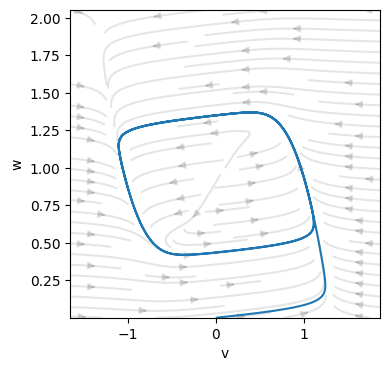

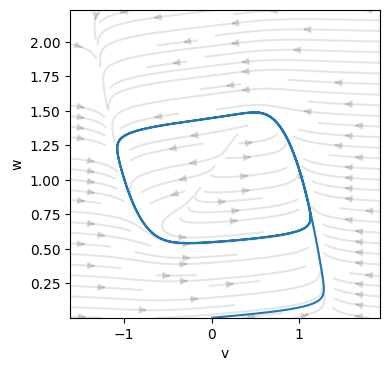

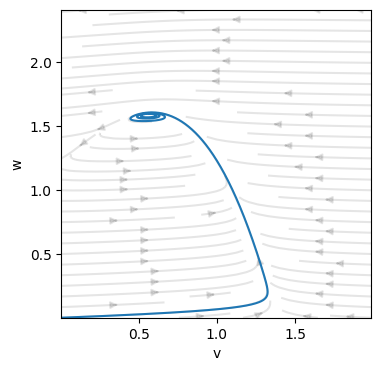

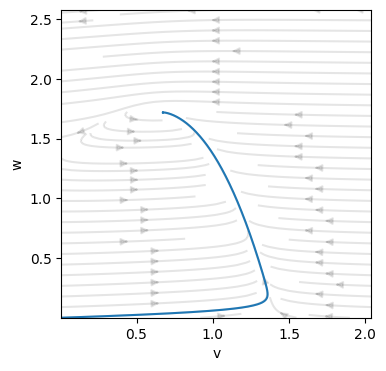

In [80]:
for i in np.arange(0, 1.5, 0.15):
  print("Iext =", i)
  get_trajectory(i, a, b, tau)

Model result for I = 0.3 is:

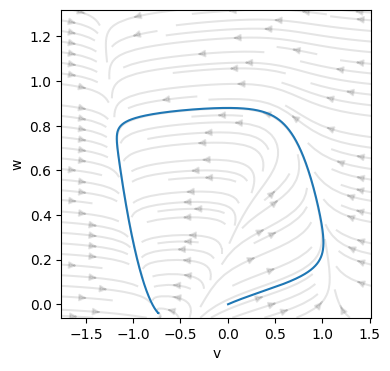

In [81]:
get_trajectory(0.3, a, b, tau)

#### 1.3 Find Equiblirium points for I=0.3

The equilibria are found at the crossing
between the null-isocline for V and the one for w. To find the equilibrium points of the FitzHugh-Nagumo model, we need to solve the system of equations where the derivatives of V and w are equal to zero(I = 0.3):

\begin{equation} 
\begin{cases}
  \dot{V} = V - V^3 - w + I = 0 \\
  \dot{w} = 0.08(V + 0.7 - 0.8 w)= 0 
\end{cases}
\end{equation}
$$⇒ V - V^3 + I = \frac{V + 0.7}{ 0.8}$$
$$⇒ V^3 + 0.25 V + 0.575 = 0$$

roots of this cube equation are as follows, one real number and two complex numbers:
$$v_1 = -0.73188, v_2 = 0.36594 + 0.807302  i, v_3 = 0.36594 - 0.807302  i$$

The local nature and stability of the equilibrium is given by linearising the flow function. This is done using the Jacobian matrix of the flow:

\begin{equation}
F(v, w) = \begin{bmatrix}
\frac{\partial v }{dt}(v, w)\\
\frac{\partial w }{dt}(v, w)
\end{bmatrix} = \begin{bmatrix}
F_1(v, w)\\
F_2(v, w)
\end{bmatrix} =  
\begin{bmatrix}
V - V^3 - w + 0.3\\
0.08(v + 0.7 - 0.8 w)
\end{bmatrix}\\
J|_{v, w} = \begin{bmatrix}
J_{1, 1} & J_{1, 2}\\
J_{2, 1} & J_{2, 2}
\end{bmatrix} = \begin{bmatrix}
\frac{\partial F_1(v, w) }{dv}& \frac{\partial F_1(v, w) }{dw}\\
\frac{\partial F_2(v, w) }{dv}& \frac{\partial F_2(v, w) }{dw}
\end{bmatrix}
= 
\begin{bmatrix}
1 - 3V^2 & -1\\
0.8 & -0.064
\end{bmatrix}
\end{equation}

then we will caculate eigen values of jacobian matrix to check the stability of equilibrium points. Stability of the fixed points requires that the real part of both eigenvalues be negative. If there are complex conjugate eigenvalues with negative real parts, then the fixed point is a stable spiral. If there are purely imaginary eigenvalues, then the fixed point is a center.

different types of fix point is as follows:
1. Node: A node is a fixed point where the eigenvalues of the Jacobian matrix have opposite signs. If both eigenvalues are negative, then the node is a stable (attracting) node. If both eigenvalues are positive, then the node is an unstable (repelling) node.

2. Focus: A focus is a fixed point where the eigenvalues of the Jacobian matrix are complex conjugates with negative real parts. If the imaginary parts of the eigenvalues are non-zero, then the focus is a stable (attracting) spiral. If the imaginary parts of the eigenvalues are zero, then the focus is a stable (attracting) center.

3. Saddle: A saddle is a fixed point where the eigenvalues of the Jacobian matrix have opposite signs and at least one eigenvalue is zero. If the zero eigenvalue is associated with a direction in which the system moves away from the fixed point, then the saddle is an unstable (repelling) saddle. If the zero eigenvalue is associated with a direction in which the system moves towards the fixed point, then the saddle is a semi-stable saddle.


$$v_1 = -0.73188 ⇒ \text{eigenvalues are }\lambda_1 , \lambda_2= \frac{-879 \pm i \sqrt{721}}{324} ⇒ v_1 \text{is a stable spiral}$$

$$v_2 = 0.36594 + 0.807302  i ⇒ \text{eigenvalues are }\lambda_1 = 2.3505 - 1.94 i , \lambda_2 = 0.266 + 0.172 i ⇒ v_2 \text{is an unstable point}$$

$$v_3 = 0.36594 - 0.807302  i ⇒ \text{eigenvalues are }\lambda_1 = 2.3505 + 1.94 i , \lambda_2 = 0.266 - 0.172 i ⇒ v_3 \text{is an unstable point}$$

Yes it coresponds with its figure in previous part, in the figure its shown a stable spiral at point with v = -0.73188.


###1.4
#### By considering I as the bifurcation parameter, check the change of the system's behavior for its different values.

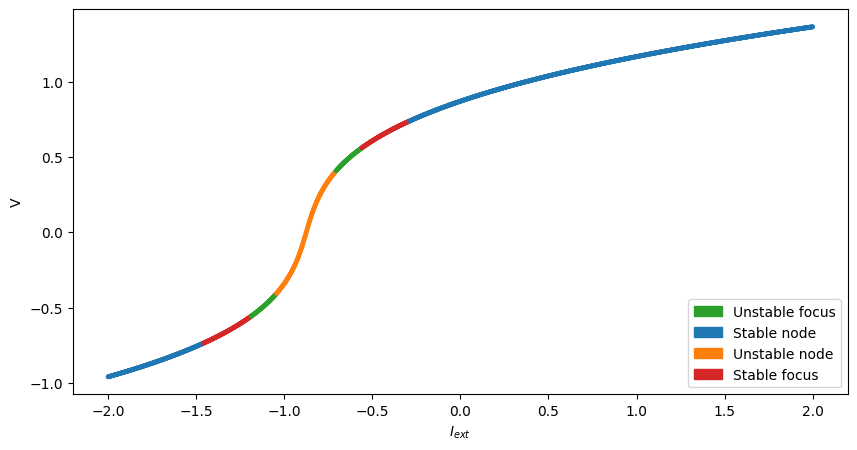

In [60]:
def poly_roots(a,b,I, tau):
    coef = [1, 0, 1/b - 1, - a/b - I]
    roots = [np.real(r) for r in np.roots(coef) if np.isreal(r)]
    return [[r, r - r**3 + I] for r in roots]

def stability(jacobian):
    eigv = np.linalg.eigvals(jacobian)
    if all(np.real(eigv)==0) and all(np.imag(eigv)!=0):
        nature = "Center" 
    elif np.real(eigv)[0]*np.real(eigv)[1]<0:
        nature = "Saddle"
    else: 
        stability = 'Unstable' if all(np.real(eigv)>0) else 'Stable'
        nature = stability + (' focus' if all(np.imag(eigv)!=0) else ' node')
    return nature


I_list, eqs_list, NC, traces, determinants = [], [], [] , [], []
a, b, tau = 0.7, 0.8, 12.5
for I in np.linspace(-2, 2,2000):
  roots = poly_roots(a,b,I, tau)
  for v,w in roots:
    J = np.array([[- 3 * v**2 + 1 , -1], [1/tau, -b/tau]])
    NC.append(stability(J))
    I_list.append(I)
    eqs_list.append(v)
    determinants.append(J[0,0]*J[1,1] - J[0,1]*J[1,0])
    traces.append(J[0,0]+J[1,1])

EQUILIBRIUM_COLOR = {'Stable node':'C0',
                    'Unstable node':'C1', 
                    'Unstable focus':'C2',
                    'Stable focus':'C3',
                    'Saddle':'C4',
                    'Center':'C5'}

fig, ax = plt.subplots(1,1,figsize=(10,5))
labels = frozenset(NC)
ax.scatter(I_list, eqs_list, c=[EQUILIBRIUM_COLOR[n] for n in NC],s=5.9)  
ax.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels,loc='lower right')
ax.set(xlabel='$I_{ext}$', 
       ylabel='V');    

Text(0.5, 1.0, 'Trace/Determinant space')

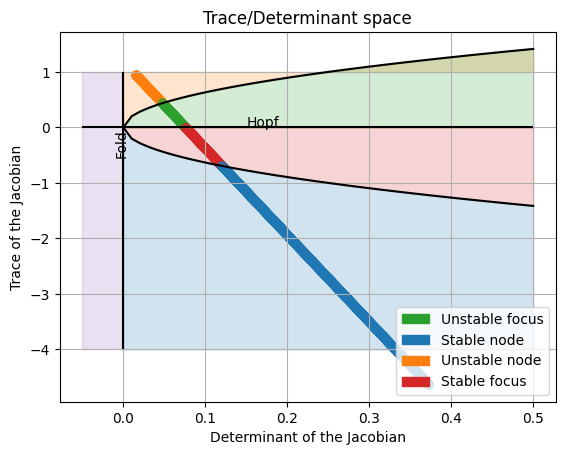

In [61]:
plt.scatter(determinants,traces, c=[EQUILIBRIUM_COLOR[n] for n in NC])
plt.grid()
x = np.linspace(0, 0.5)
plt.plot(x, np.sqrt(4*x),color='k')
plt.plot(x, -np.sqrt(4*x),color='k')
plt.vlines(0, -4, 1, color='k')
plt.hlines(0, -0.05,x.max(), color='k')
plt.text(-0.01, -0.5, 'Fold', rotation=90)
plt.text(0.15, 0.015, 'Hopf')

plt.gca().set(xlabel='Determinant of the Jacobian', ylabel='Trace of the Jacobian')
plt.fill_between(x,-np.sqrt(4*x),-4, color=EQUILIBRIUM_COLOR['Stable node'], alpha=0.2)
plt.fill_between(x,0,-np.sqrt(4*x), color=EQUILIBRIUM_COLOR['Stable focus'], alpha=0.2)
plt.fill_between(x,np.sqrt(4*x),1, color=EQUILIBRIUM_COLOR['Unstable node'], alpha=0.2)
plt.fill_between(x,0,np.sqrt(4*x), color=EQUILIBRIUM_COLOR['Unstable focus'], alpha=0.2)
plt.fill_between([-0.05,0],-4,1, color=EQUILIBRIUM_COLOR['Saddle'], alpha=0.2)
plt.legend([mpatches.Patch(color=EQUILIBRIUM_COLOR[n]) for n in labels], labels, loc='lower right')
plt.title("Trace/Determinant space")

### 1.5
### Does this neuronal model have a limit cycle?
Periodic behavior only happen when there are 3 equilibria, on saddle point and two unstable (focus or node)

A limit cycle in a neural model is a repetitive pattern of activity that emerges when the model is stimulated with a constant input. It is a stable oscillation that repeats itself over time.

To check whether a limit cycle exists in a neural model, one can use numerical simulations to stimulate the model with a constant input and observe the behavior over time. If the activity of the neurons in the model oscillates and repeats itself in a stable manner, then a limit cycle exists. Alternatively, one can use mathematical analysis techniques such as bifurcation analysis or phase plane analysis to identify the existence of limit cycles in the model.


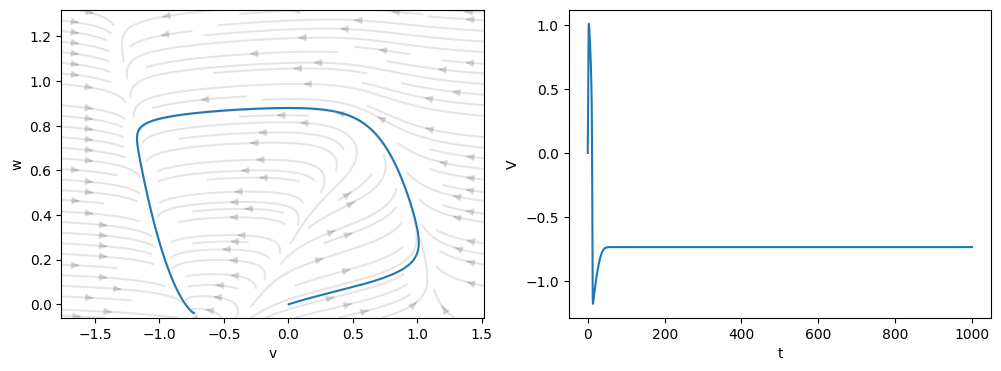

In [62]:
def plot_neuon_potential(Iext, a, b, tau):
  times = bm.arange(0, 1000, 0.01)
  hist_V = []
  hist_w = []
  V, w = 0., 0.
  for t in times:
     V, w = fitzhugh_nagumo(V, w, t, Iext, a, b, tau)
     hist_V.append(V)
     hist_w.append(w)
  fig, ax = plt.subplots(1,2, figsize=(12, 4))
  x_range = (zoom_out(np.min(hist_V), False), zoom_out(np.max(hist_V), True))
  y_range = (zoom_out(np.min(hist_w), False), zoom_out(np.max(hist_w), True))
  plot_vector_field(ax[0], x_range, y_range, Iext, a, b, tau)
  ax[0].set(xlabel='v', ylabel='w')
  ax[0].plot(hist_V, hist_w)
  ax[1].plot(times, hist_V)
  ax[1].set(xlabel='t', ylabel='V')
  fig.show()  

plot_neuon_potential(0.3, a, b, tau) 

as we can see neuron dosent have any periodic behavior, therefor ths model dosent have a limit cycle.

but at Iext = 0.6 we can see that it has a periodic behavior, so it has a limit cycle.

Also, the limit cycle is well visible in the phase plane plot below.

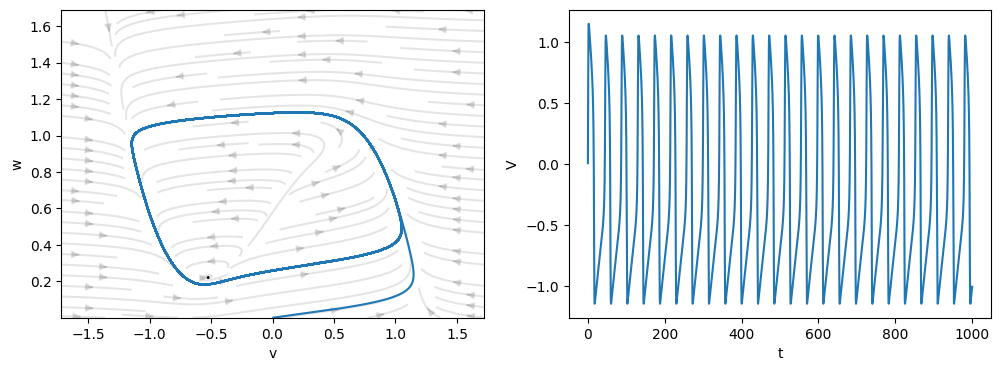

In [63]:
plot_neuon_potential(0.6, a, b, tau) 

### 1.6
### Changing second ODE like below, Do the model able to have a limit cycle for a >> 1(tau << 1)?
### $$\dot{w } = a(v + 0.7 - 0.8 w)$$

lets stimulate the new model, and observe its behavior.
The value of tau affects the time scale of the model.

As shown below it dose'nt have a limiit cycle.

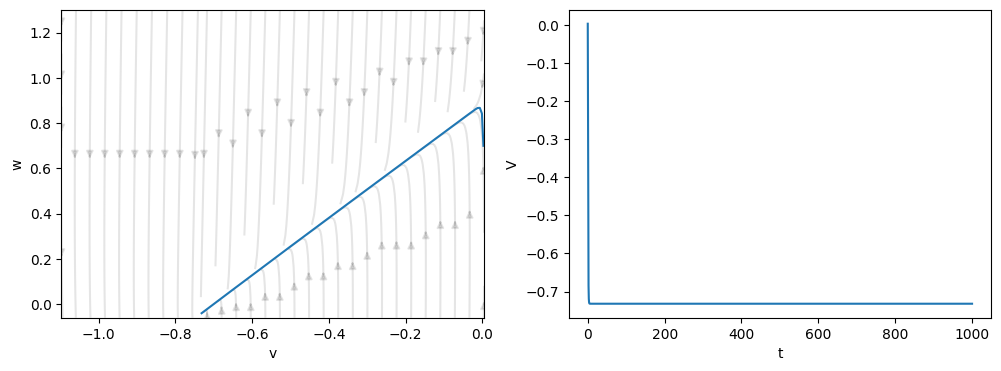

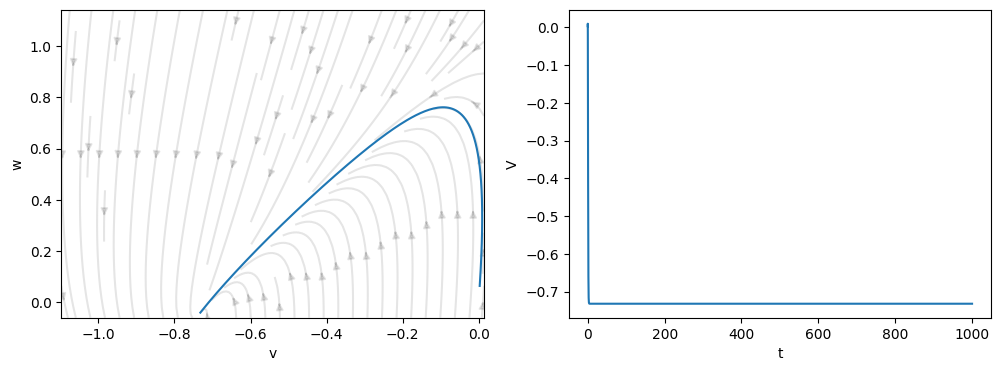

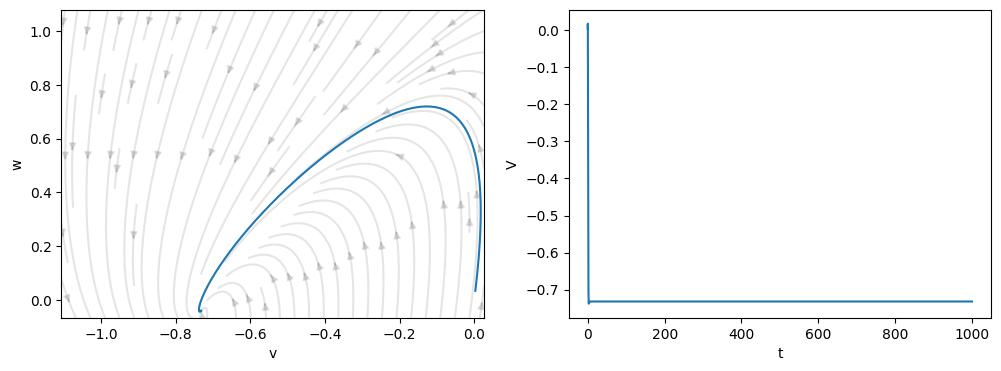

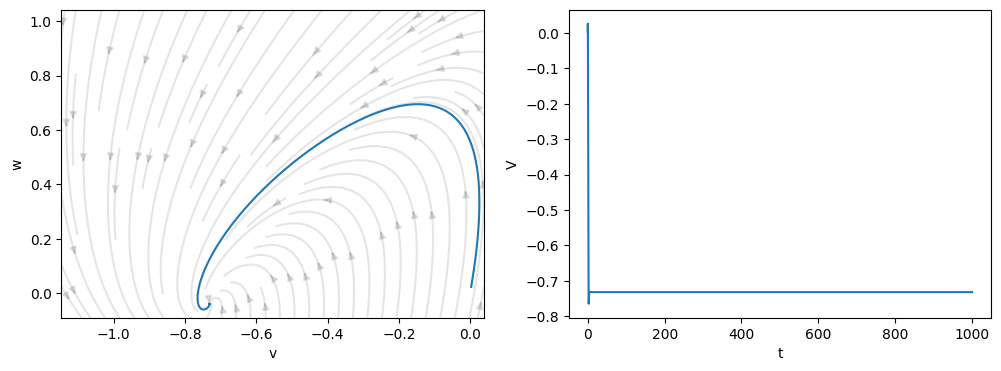

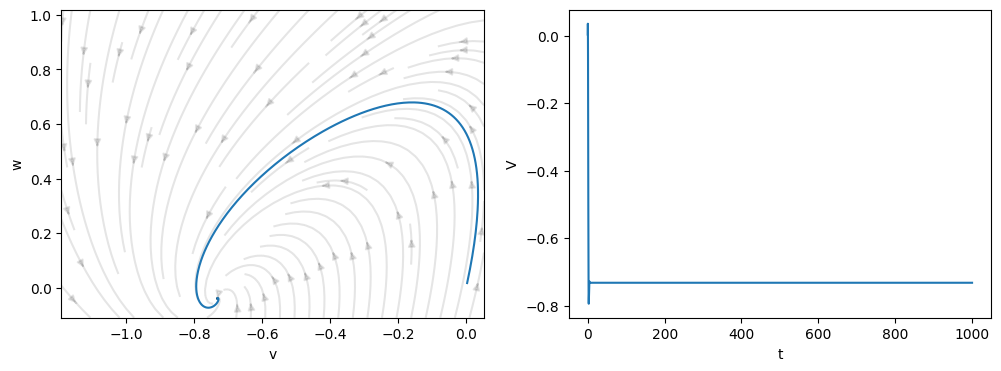

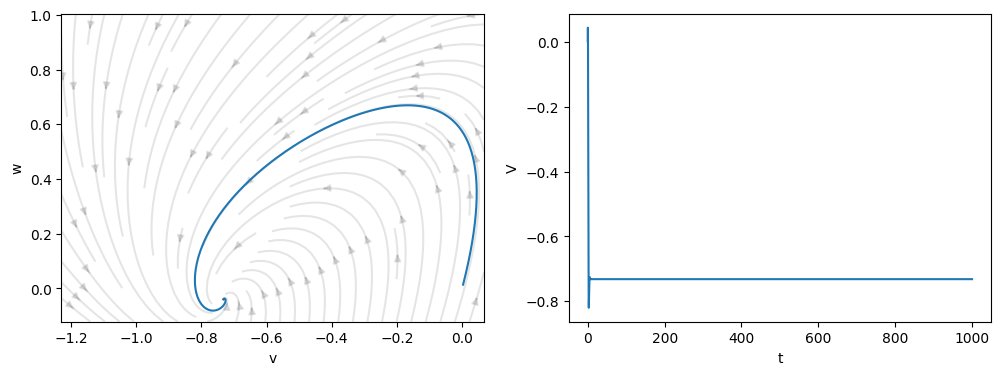

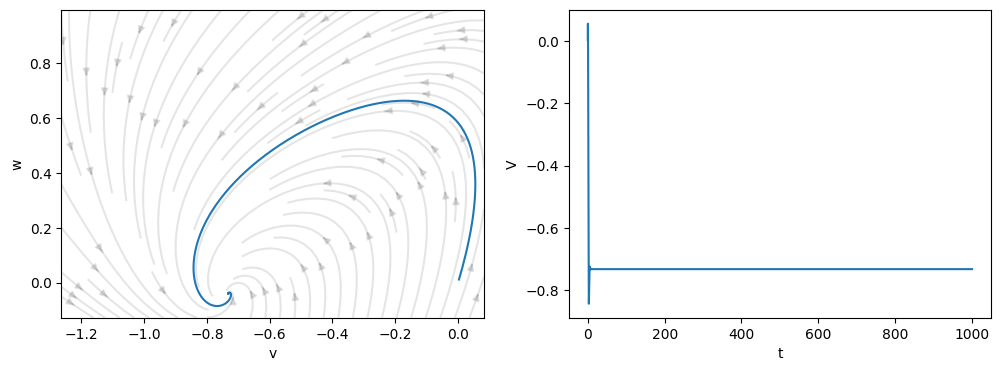

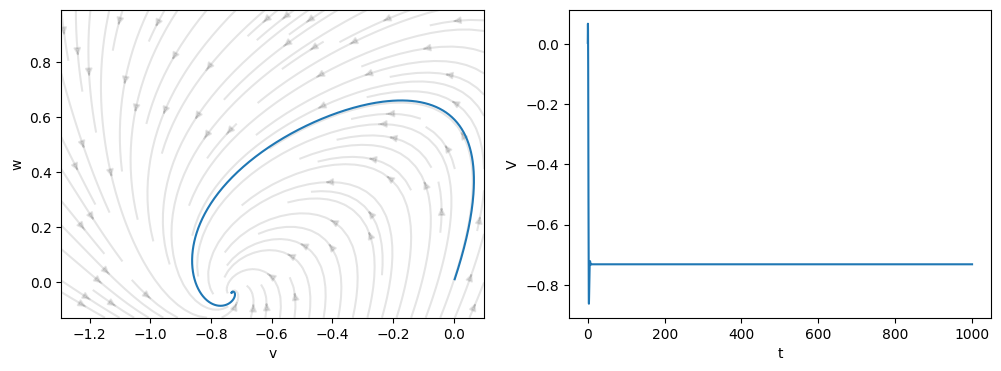

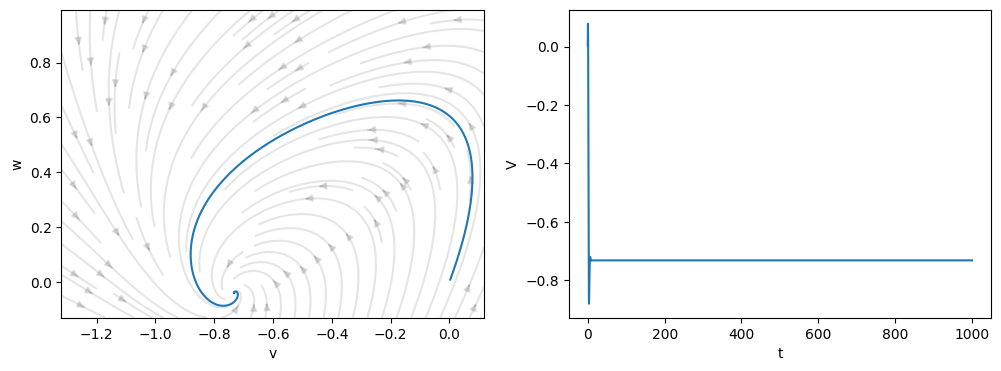

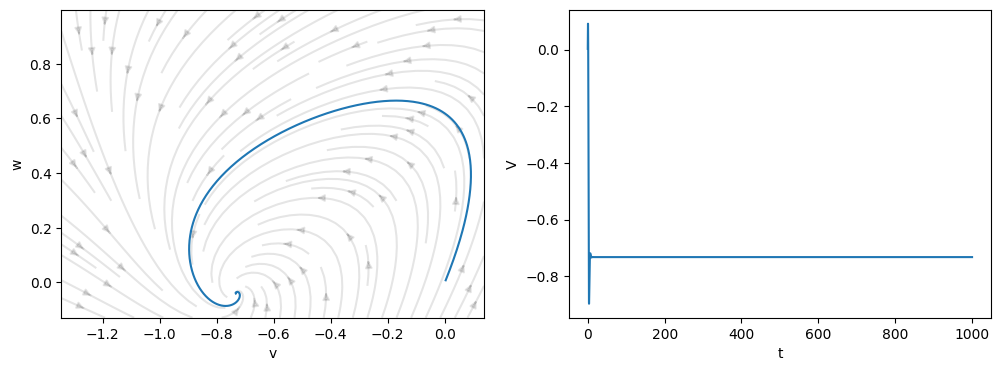

In [74]:
for t in np.linspace(0.01, 0.9, 10):
  plot_neuon_potential(0.3, 0.7, 0.8, t) 